# Prasad Sanjay Khalkar

# Roll No: 33138

# TE-09 L-09

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage

In [44]:
df = pd.read_csv("/home/prasadkhalkar/Desktop/ML/Datasets/Mall_Customers.csv")
mall = df.copy()
mall

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## For Annual Income vs Spending Score

In [45]:
mall = mall[["Annual Income (k$)","Spending Score (1-100)"]]
mall

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [46]:
temp = pd.DataFrame(distance_matrix(mall.values,mall.values))

/home/prasadkhalkar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


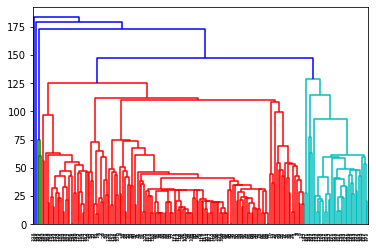

In [47]:
linkage_matrix = linkage(temp)
dendrogram(linkage_matrix,orientation='top')
plt.show()

In [50]:
ac = AgglomerativeClustering(n_clusters=4)
model = ac.fit(mall)
mall["labels"] = model.labels_
mall

/home/prasadkhalkar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Annual Income (k$),Spending Score (1-100),labels
0,15,39,0
1,15,81,3
2,16,6,0
3,16,77,3
4,17,40,0
...,...,...,...
195,120,79,2
196,126,28,1
197,126,74,2
198,137,18,1


In [51]:
colors = {0:'green',1:'red',2:'blue',3:'cyan'}
col=[]
for i in model.labels_:
    col.append(colors[i])

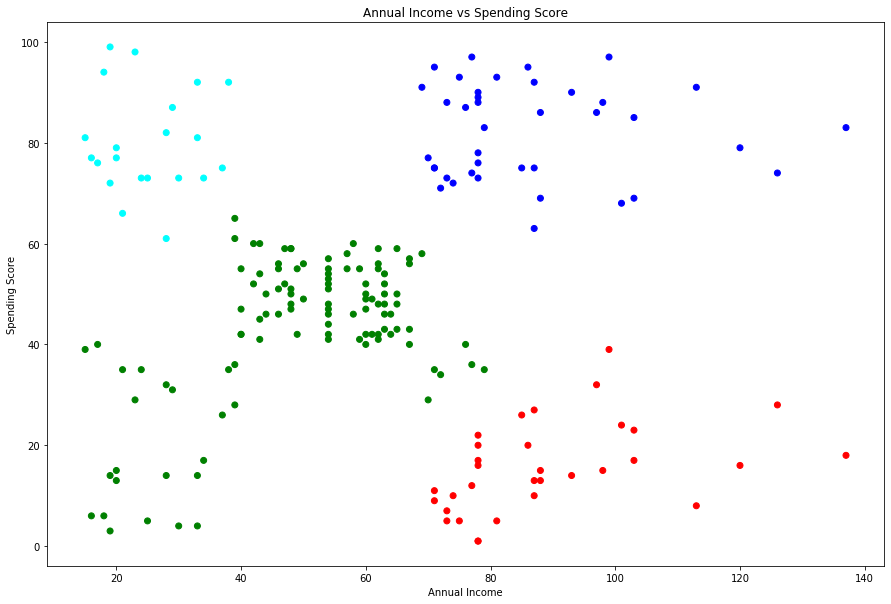

In [52]:
plt.figure(figsize=(15,10))
plt.scatter(mall[["Annual Income (k$)"]],mall[["Spending Score (1-100)"]],c=col)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Annual Income vs Spending Score")
plt.show()

## For Age vs Spending Score

In [53]:
A = df.copy()
A = A[["Age","Spending Score (1-100)"]]
A

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [54]:
B = pd.DataFrame(distance_matrix(A.values,A.values))

/home/prasadkhalkar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


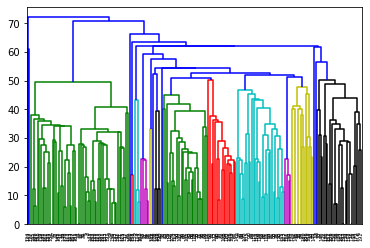

In [55]:
linkage_matrix = linkage(B)
dendrogram(linkage_matrix,orientation='top')
plt.show()

In [57]:
ac = AgglomerativeClustering(n_clusters=5)
model1 = ac.fit(A)
A["labels"] = model1.labels_
A

,Age,Spending Score (1-100),labels
0,19,39,4
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3
...,...,...,...
195,35,79,1
196,45,28,3
197,32,74,1
198,32,18,2


In [59]:
colors = {0:'green',1:'red',2:'blue',3:'cyan',4:'yellow'}
col=[]
for i in model1.labels_:
    col.append(colors[i])

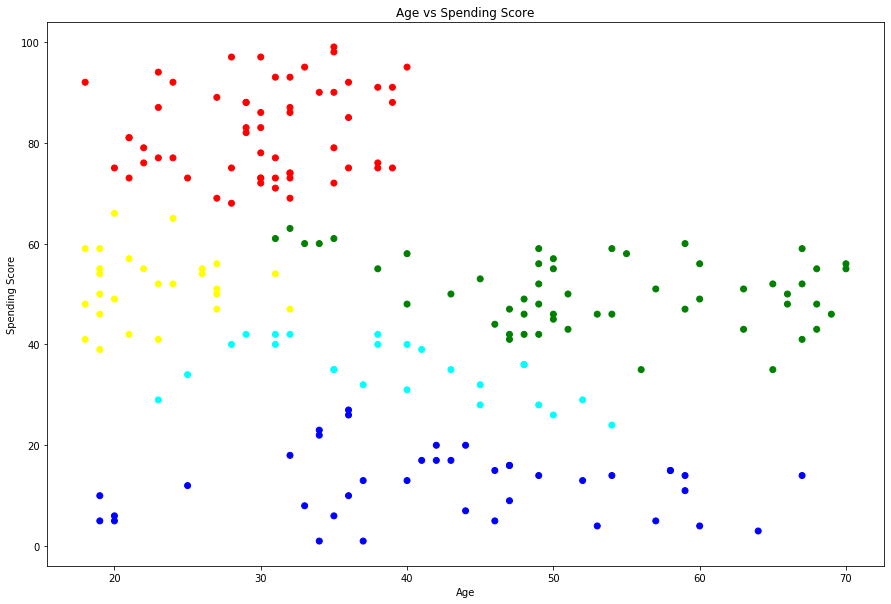

In [61]:
plt.figure(figsize=(15,10))
plt.scatter(A[["Age"]],A[["Spending Score (1-100)"]],c=col)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Age vs Spending Score")
plt.show()